# Loading Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pwd

'f:\\Learning\\TF_2_Notebooks_and_Data\\Deep learning self work'

# Reading Data

In [6]:
df = pd.read_csv("f:\\Learning\\TF_2_Notebooks_and_Data\\DATA\\RSCCASN.csv",parse_dates=True,index_col='DATE')

In [7]:
df.head()

,RSCCASN
DATE,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 334 entries, 1992-01-01 to 2019-10-01
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   RSCCASN  334 non-null    int64
dtypes: int64(1)
memory usage: 5.2 KB


In [9]:
df.columns = ['Sales']
df.head()

,Sales
DATE,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558


<Axes: xlabel='DATE'>

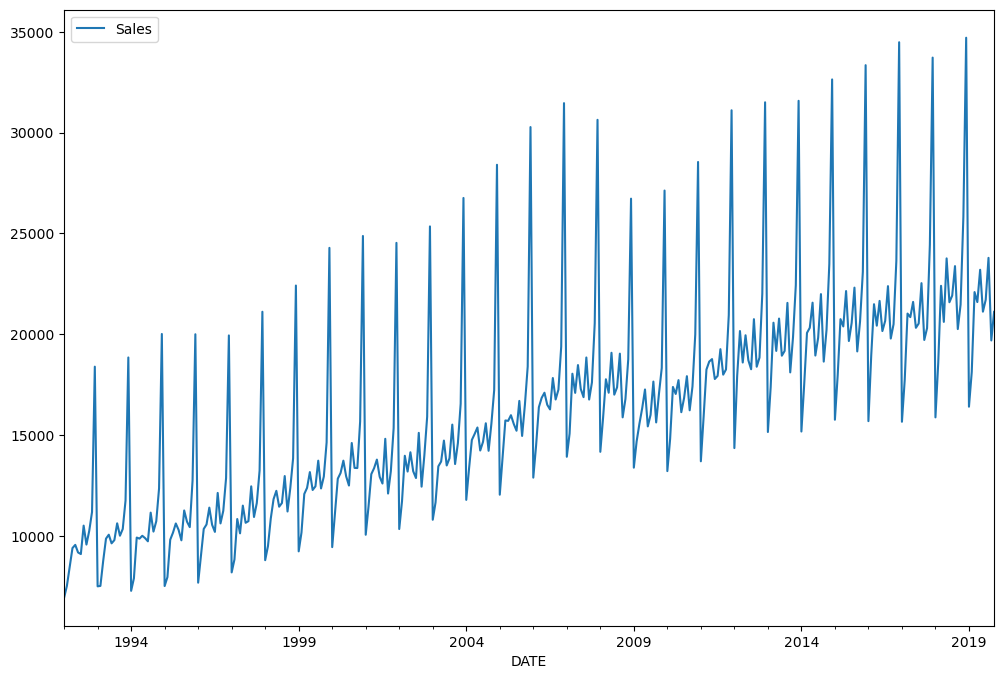

In [10]:
df.plot(figsize=(12,8))

In [11]:
len(df)

334

# Train Test Split

In [13]:
test_size = 18
test_ind = len(df)-test_size

In [14]:
train = df.iloc[:test_ind]
test = df.iloc[test_ind:]

In [15]:
train

,Sales
DATE,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558
...,...
2017-12-01,33720
2018-01-01,15881
2018-02-01,18585


In [16]:
test

,Sales
DATE,
2018-05-01,23764
2018-06-01,21589
2018-07-01,21919
2018-08-01,23381
2018-09-01,20260
2018-10-01,21473
2018-11-01,25831
2018-12-01,34706
2019-01-01,16410


# Preprocessing Data

In [17]:
from sklearn.preprocessing import MinMaxScaler

In [18]:
scaler = MinMaxScaler()
scaler.fit(train)

MinMaxScaler()

In [19]:
scaled_train = scaler.transform(train)

In [20]:
scaled_test = scaler.transform(test)

In [22]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

# Creating Generator

In [34]:
length = 12
generator = TimeseriesGenerator(scaled_train,scaled_train,length=length,batch_size=1)

In [35]:
X,y = generator[0]

In [38]:
# X

In [39]:
# y

# Model Training and Evaluation

## I. Training on training data and Evaluating on Test data

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM

In [41]:
n_features=1

In [42]:
model = Sequential()
model.add(LSTM(100,activation='relu',input_shape=(length,n_features)))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [43]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               40800     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [44]:
from tensorflow.keras.callbacks import EarlyStopping

In [54]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [46]:
validation_gen = TimeseriesGenerator(scaled_test,scaled_test,length=length,batch_size=1)

In [55]:
model.fit(generator,epochs=20,validation_data=validation_gen,callbacks=[early_stop])

Epoch 1/20


304/304 [==============================] - 3s 11ms/step - loss: 0.0016 - val_loss: 0.0034
Epoch 2/20
304/304 [==============================] - 3s 9ms/step - loss: 0.0015 - val_loss: 5.9482e-04
Epoch 3/20
304/304 [==============================] - 3s 10ms/step - loss: 0.0011 - val_loss: 0.0024
Epoch 4/20
304/304 [==============================] - 3s 11ms/step - loss: 0.0012 - val_loss: 8.5972e-04


In [56]:
losses = pd.DataFrame(model.history.history)

In [57]:
losses

,loss,val_loss
0,0.001613,0.003426
1,0.001549,0.000595
2,0.001124,0.002395
3,0.001219,0.000860


<Axes: >

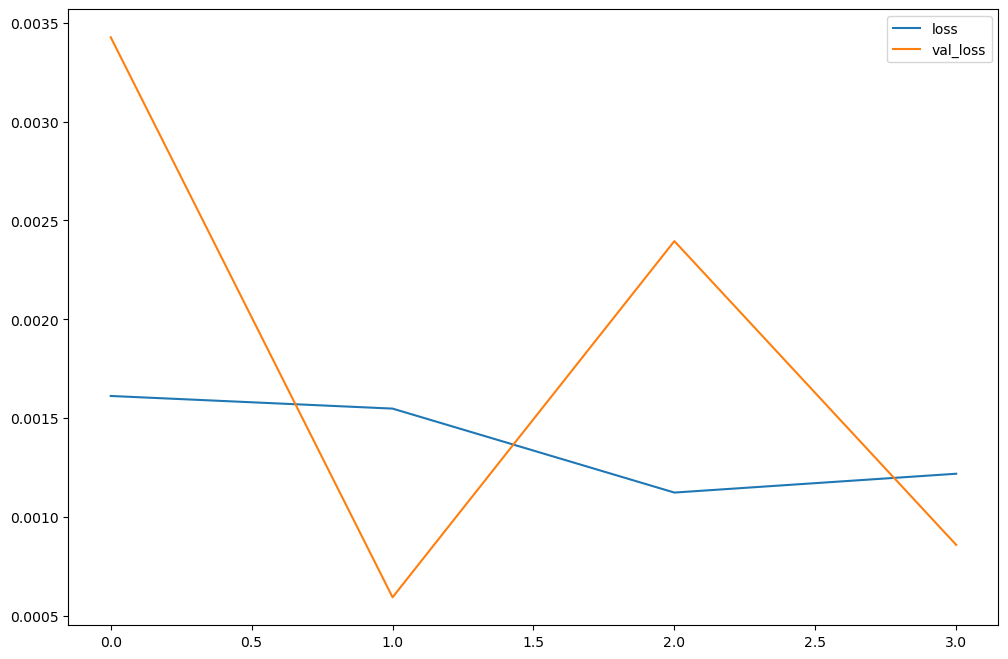

In [58]:
losses.plot(figsize=(12,8))

In [59]:
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1,length,n_features))

for i in range(len(test)):
    current_pred = model.predict(current_batch)[0]
    test_predictions.append(current_pred)

    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)


1/1 [==============================] - 0s 38ms/step


In [60]:
true_predictions = scaler.inverse_transform(test_predictions)

In [61]:
true_predictions

array([[21938.05716085],
       [21000.12519407],
       [21166.92046118],
       [22675.91393948],
       [20596.73400259],
       [21098.32813215],
       [24299.25861216],
       [32632.19721127],
       [17102.36855984],
       [19574.04339123],
       [22464.34814072],
       [21167.10433722],
       [22184.24911594],
       [21499.1056571 ],
       [21628.88930464],
       [22764.57994986],
       [21223.85964632],
       [21625.61893797]])

In [62]:
test

,Sales
DATE,
2018-05-01,23764
2018-06-01,21589
2018-07-01,21919
2018-08-01,23381
2018-09-01,20260
2018-10-01,21473
2018-11-01,25831
2018-12-01,34706
2019-01-01,16410


In [63]:
test['Predictions'] = true_predictions

C:\Users\abc\AppData\Local\Temp\ipykernel_12184\4269337381.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = true_predictions


In [64]:
test

,Sales,Predictions
DATE,,
2018-05-01,23764,21938.057161
2018-06-01,21589,21000.125194
2018-07-01,21919,21166.920461
2018-08-01,23381,22675.913939
2018-09-01,20260,20596.734003
2018-10-01,21473,21098.328132
2018-11-01,25831,24299.258612
2018-12-01,34706,32632.197211
2019-01-01,16410,17102.368560


<Axes: xlabel='DATE'>

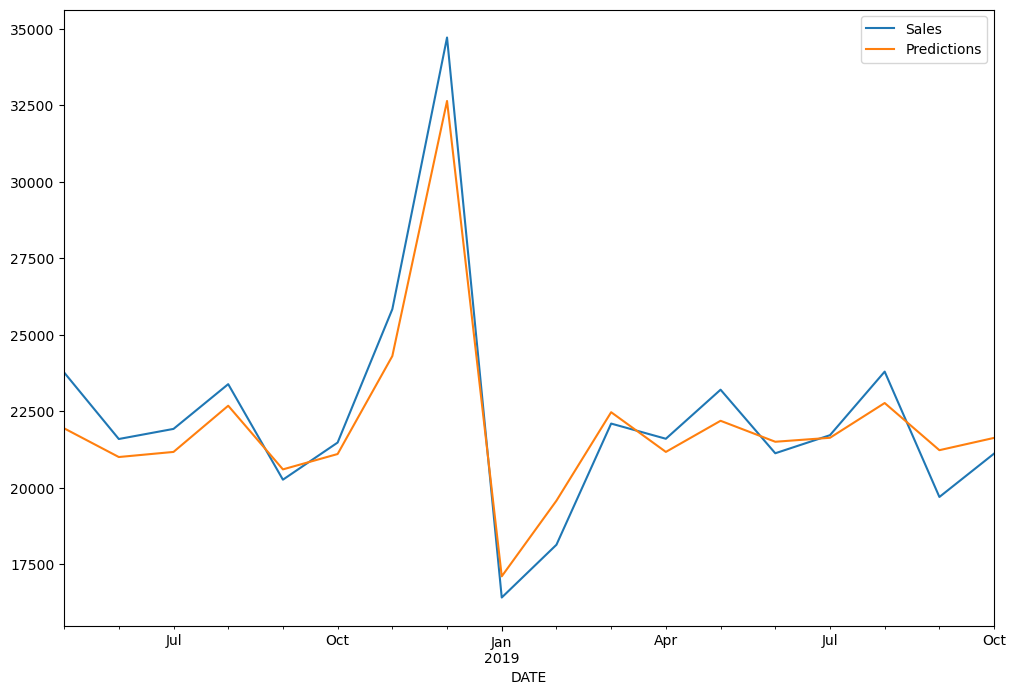

In [65]:
test.plot(figsize=(12,8))

## II. Training on the entire dataset and Forecasting unknown values

In [66]:
full_scaler = MinMaxScaler()
scaled_df = full_scaler.fit_transform(df)

In [67]:
length=12
generator = TimeseriesGenerator(scaled_df,scaled_df,length=length,batch_size=1)

In [68]:
model = Sequential()
model.add(LSTM(100,activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

In [69]:
model.fit(generator,epochs=5)

Epoch 1/5
322/322 [==============================] - 6s 10ms/step - loss: 0.0244
Epoch 2/5
322/322 [==============================] - 3s 10ms/step - loss: 0.0190
Epoch 3/5
322/322 [==============================] - 3s 9ms/step - loss: 0.0136
Epoch 4/5
322/322 [==============================] - 3s 10ms/step - loss: 0.0069
Epoch 5/5
322/322 [==============================] - 3s 9ms/step - loss: 0.0032


In [70]:
forecast = []
periods=12
first_eval_batch = scaled_df[-length:]
current_batch = first_eval_batch.reshape((1,length,n_features))

for i in range(periods):
    current_pred = model.predict(current_batch)[0]
    forecast.append(current_pred)

    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)


1/1 [==============================] - 0s 52ms/step


In [71]:
forecast = full_scaler.inverse_transform(forecast)

In [72]:
forecast

array([[26101.54129648],
       [35508.31720638],
       [17742.16840887],
       [19315.07865834],
       [22404.83506727],
       [22148.28767157],
       [23470.38628054],
       [21853.62328196],
       [22387.97289038],
       [24053.08637714],
       [20944.61324978],
       [22190.79565048]])

In [73]:
df

,Sales
DATE,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558
...,...
2019-06-01,21123
2019-07-01,21714
2019-08-01,23791


In [74]:
forecast_index = pd.date_range(start='2019-11-01',periods=periods,
                               freq='MS')

In [75]:
forecast_index

DatetimeIndex(['2019-11-01', '2019-12-01', '2020-01-01', '2020-02-01',
               '2020-03-01', '2020-04-01', '2020-05-01', '2020-06-01',
               '2020-07-01', '2020-08-01', '2020-09-01', '2020-10-01'],
              dtype='datetime64[ns]', freq='MS')

In [76]:
forecast_df = pd.DataFrame(data=forecast,index=forecast_index,
                           columns=['Forecast'])

In [77]:
forecast_df

,Forecast
2019-11-01,26101.541296
2019-12-01,35508.317206
2020-01-01,17742.168409
2020-02-01,19315.078658
2020-03-01,22404.835067
2020-04-01,22148.287672
2020-05-01,23470.386281
2020-06-01,21853.623282
2020-07-01,22387.972890
2020-08-01,24053.086377


<Axes: xlabel='DATE'>

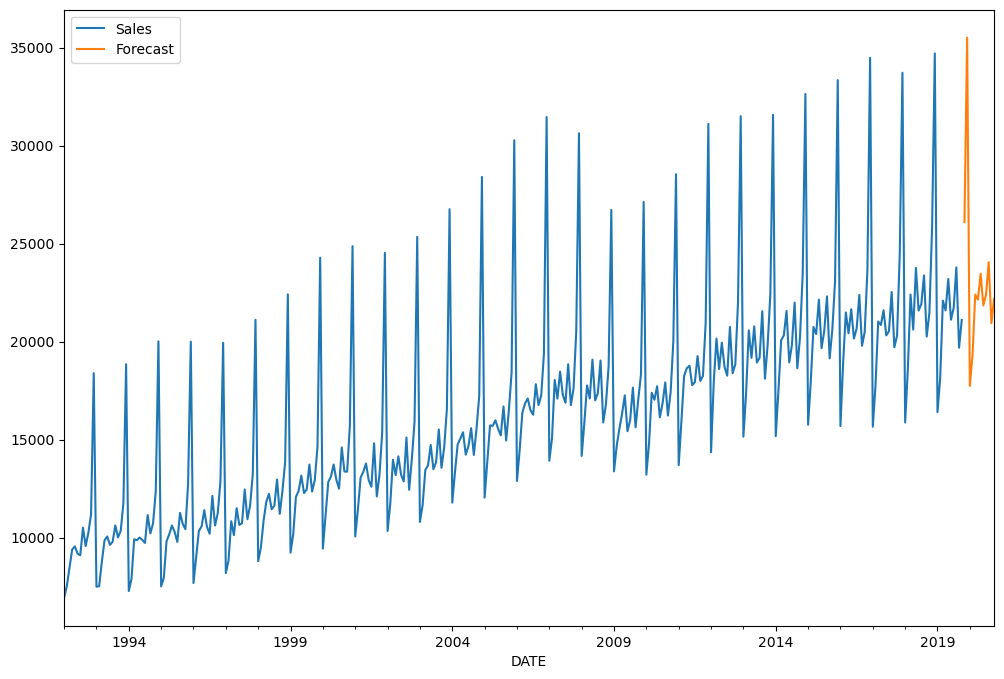

In [88]:
ax = df.plot()
forecast_df.plot(ax=ax,figsize=(12,8))

<Axes: >

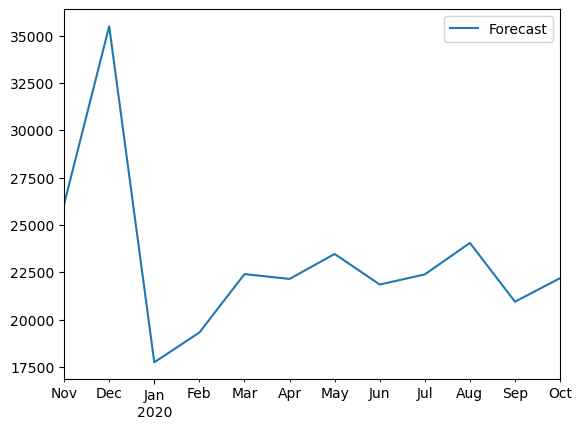

In [89]:
forecast_df.plot()